## Theoretical and Practical BER Vs SNR Plot for BPSK

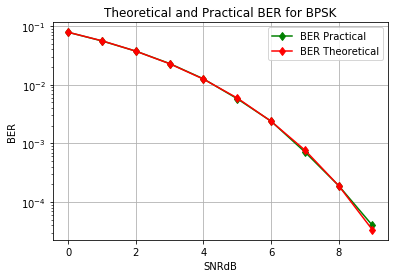

In [14]:
import numpy as np
from scipy.special import erfc
import matplotlib.pyplot as plt

SNRdB=np.arange(0,10) ## Range of SNR in dB
SNR= 10**(SNRdB/10) 

data_len=1000000 ## length of data
unipolardata= np.random.randint(0,2,data_len) ## Generating unipolar data
polardata= 2*unipolardata-1 ## Unipolar to polar conversion for BPSK
loop=0
BER_PR=np.empty(np.shape(SNRdB))
BER_TH= np.empty(np.shape(SNRdB))
for snr in SNR:
    No=1/snr
    noise = np.sqrt(No/2)*np.random.randn(data_len) ## Generating noise
    rec_data= polardata+noise ## adding noise to polardata
    decoded_rec_data= np.sign(rec_data)
    unipolar_rec_data= (decoded_rec_data+1)/2 ## Converting polar to unipolar data
    error= np.where(unipolar_rec_data!= unipolardata) ## compare data at transmitter with demodulated data
                                                    ##and count the number of erroroneous bits
    total_error_bits= len(error[0])
    BER_PR[loop]= total_error_bits/data_len ## Find practical Bit Error Rate
    BER_TH[loop]= 0.5*erfc(np.sqrt(snr)) ## Find theoretical Bit Error Rate
    loop += 1

plt.semilogy(SNRdB,BER_PR, '-gd',SNRdB, BER_TH, '-rd')
plt.legend(('BER Practical', 'BER Theoretical'))
plt.xlabel('SNRdB')
plt.ylabel('BER')
plt.title('Theoretical and Practical BER for BPSK')
plt.grid()
plt.show()
